# Results to test different methods for approximating access costs at zone level

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

column_mapping = {'KNN_5': 'knn_5', 'KNN_15': 'knn_15', 'KNN_25': 'knn_25'}

/tmp/ipykernel_155585/403384402.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# open a file, where you stored the pickled data
file = open('results/performance.pkl', 'rb')
# dump information to that file
performance = pickle.load(file)
# close the file
file.close()

# open a file, where you stored the pickled data
file = open('results/processing_times.pkl', 'rb')
# dump information to that file
processing_times = pickle.load(file)
# close the file
file.close()

In [3]:
res_list = []
for it in range(5):
    for stratum in ['wdam','wdpm','sat','bh']:
        iteration_results = performance[it][stratum]
        iteration_processing_times = processing_times[it][stratum]

        iteration_processing_times = iteration_processing_times.rename(columns=column_mapping)

        methods = list(iteration_results.columns[1:])


        for m in methods:
            res_append = {}
            res_append['iteration'] = it
            res_append['stratum'] = stratum
            res_append['method'] = m
            res_append['corr'] = np.corrcoef(iteration_results[m],iteration_results['GM'])[0][1]
            res_append['cost'] = iteration_processing_times[m].sum()
            res_list.append(res_append)

results = pd.DataFrame(res_list)

In [7]:
results.to_csv('results_check.csv')

Decide best parameter set for each method

- Output to excel and observe

In [4]:
methods_to_analyse = ['dbscan_0.01_3','flowhdbscan_7_5_5','hdbscan_3_3','kmean_9','knn_25','g-tgm']

methods_labels = {
    'dbscan_0.01_3':'Sp-Cl-DB',
    'flowhdbscan_7_5_5':'Flow-CL',
    'hdbscan_3_3':'Sp-Cl-HDB',
    'kmean_9':'Sp-Cl-KM',
    'knn_25':'KNN',
    'g-tgm':'G-TGM'
}

methodorder = ['Sp-Cl-KM','Sp-Cl-DB','Sp-Cl-HDB','Flow-CL','KNN','G-TGM']
methodcolors = sns.color_palette(palette='deep', n_colors=len(methodorder))

method_colour_dict = {}
c_ind = 0 
for c in methodorder:
    method_colour_dict[c] = methodcolors[c_ind]
    c_ind += 1

stratumorder = ['wdam','wdpm','sat','bh']

In [6]:
results_filt = results[results['method'].isin(methods_to_analyse)]
results_filt['method-label'] = results_filt['method'].map(methods_labels)
results_filt['corr'] = abs(results_filt['corr'])
results_filt['colour'] = results_filt['method-label'].map(method_colour_dict)
results_filt['cost hours'] = round(results_filt['cost'] / 3600, 2)

/tmp/ipykernel_155585/7078936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_filt['method-label'] = results_filt['method'].map(methods_labels)
/tmp/ipykernel_155585/7078936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_filt['corr'] = abs(results_filt['corr'])
/tmp/ipykernel_155585/7078936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [7]:
grouped = results_filt.groupby(['stratum','method-label'])['corr'].mean().unstack()
grouped = grouped.reindex(methodorder, axis=1)
grouped = grouped.reindex(stratumorder, axis=0)

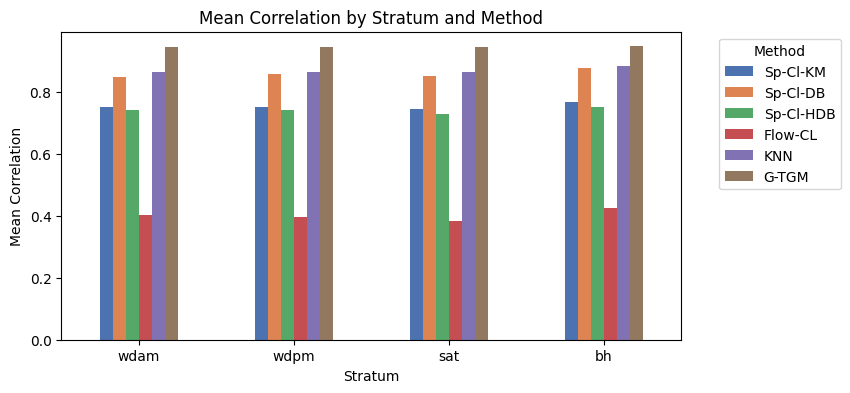

In [110]:
fig, ax = plt.subplots(1,figsize=(8,4))

grouped.plot(kind='bar', color=methodcolors, ax=ax)
ax.set_xlabel('Stratum')
ax.set_ylabel('Mean Correlation')
ax.set_title('Mean Correlation by Stratum and Method')
ax.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', labelrotation= 0)
plt.show()

In [9]:
groupedstd = results_filt.groupby(['stratum','method-label'])['corr'].std().unstack()
groupedstd = groupedstd.reindex(methodorder, axis=1)
groupedstd = groupedstd.reindex(stratumorder, axis=0)

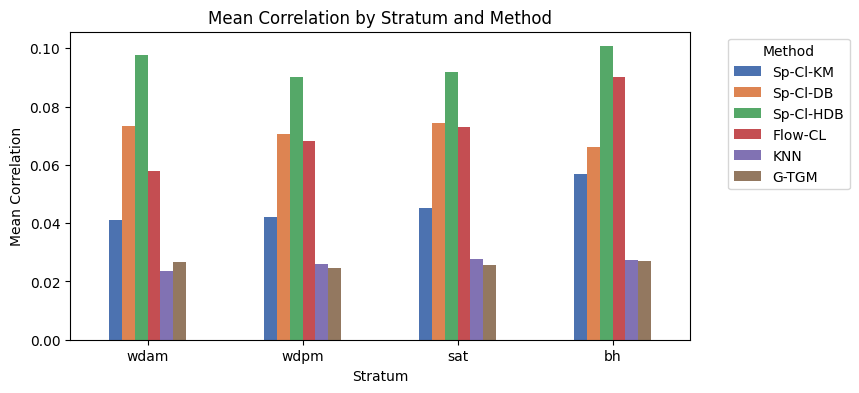

In [10]:
fig, ax = plt.subplots(1,figsize=(8,4))

groupedstd.plot(kind='bar', color=methodcolors, ax=ax)
ax.set_xlabel('Stratum')
ax.set_ylabel('Mean Correlation')
ax.set_title('Mean Correlation by Stratum and Method')
ax.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', labelrotation= 0)
plt.show()

In [141]:
legend_handles = []
for k in method_colour_dict.keys():
    legend_handles.append(Line2D([0], [0], label=k, marker="o", markersize=8, markeredgecolor=method_colour_dict[k], markerfacecolor=method_colour_dict[k], linestyle=''))

/tmp/ipykernel_24474/1723763361.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0,0].scatter(r['cost hours'],r['corr'], c = r['colour'])
/tmp/ipykernel_24474/1723763361.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0,1].scatter(r['cost hours'],r['corr'], c = r['colour'])
/tmp/ipykernel_24474/1723763361.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided 

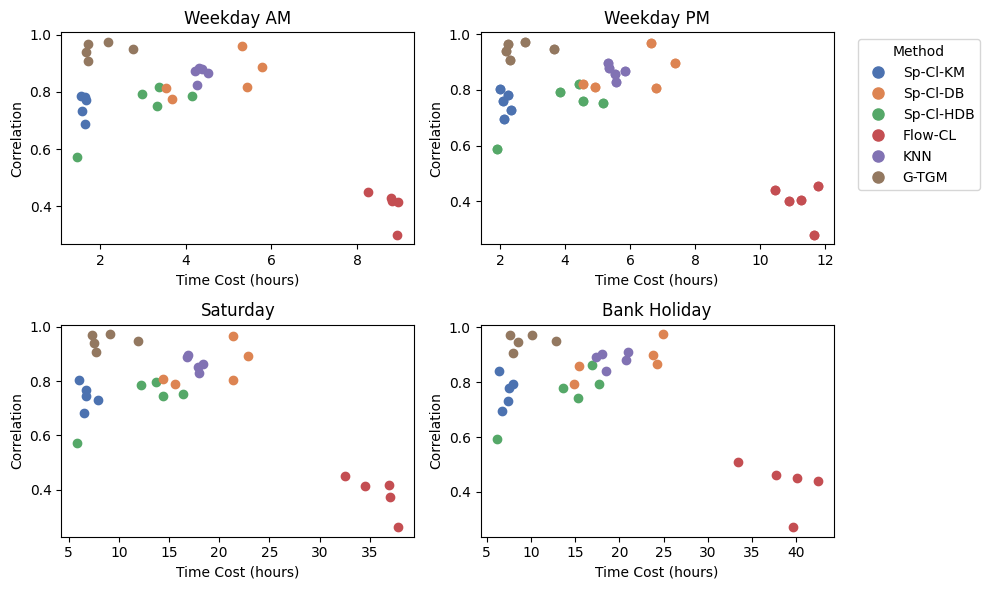

In [142]:
fig, ax = plt.subplots(2,2,figsize=(10,6))

for i,r in results_filt[results_filt['stratum'] == 'wdam'].iterrows():
    ax[0,0].scatter(r['cost hours'],r['corr'], c = r['colour'])
    ax[0,0].set_xlabel('Time Cost (hours)')
    ax[0,0].set_ylabel('Correlation')
    ax[0,0].set_title('Weekday AM')

for i,r in results_filt[results_filt['stratum'] == 'wdpm'].iterrows():
    ax[0,1].scatter(r['cost hours'],r['corr'], c = r['colour'])
    ax[0,1].scatter(r['cost hours'],r['corr'], c = r['colour'])
    ax[0,1].set_xlabel('Time Cost (hours)')
    ax[0,1].set_ylabel('Correlation')
    ax[0,1].set_title('Weekday PM')
    ax[0,1].legend(handles=legend_handles,title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

for i,r in results_filt[results_filt['stratum'] == 'sat'].iterrows():
    ax[1,0].scatter(r['cost hours'],r['corr'], c = r['colour'])
    ax[1,0].set_xlabel('Time Cost (hours)')
    ax[1,0].set_ylabel('Correlation')
    ax[1,0].set_title('Saturday')

for i,r in results_filt[results_filt['stratum'] == 'bh'].iterrows():
    ax[1,1].scatter(r['cost hours'],r['corr'], c = r['colour'])
    ax[1,1].set_xlabel('Time Cost (hours)')
    ax[1,1].set_ylabel('Correlation')
    ax[1,1].set_title('Bank Holiday')

plt.tight_layout()
plt.show()

Next Steps

- Get correlation plots to further observe this